[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/AM/blob/main/2_Gradiente_Descendente_RegL.ipynb)


# Introdução ao Aprendizado de Máquina

**Professor: Diogo Ferreira de Lima Silva (TEP)**

**PPGEP - UFF**


Este notebook foi criado é com base em:

- Raschka, S., Liu, Y. H., Mirjalili, V., & Dzhulgakov, D. (2022). Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing Ltd.

- Veja também o código do capítulo 9: https://github.com/rasbt/machine-learning-book



In [1]:
### Bibliotecas Básicas
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Gradiente Descendente em Regressão Linear

Nessa aula, vamos implementar o algoritmo gradiente descendente para regressão linear.

Para isso, utilizaremos os conceitos de Classes em Python.

## Implementando o Gradiente Descendente

Inicialmente, vamos criar uma classe vazia, sem nenhum método ou construtor.

In [2]:
class LinearRegressionGD:
    pass

Em python, é comum que iniciemos as classes com um método especial, chamado usando o operador: __init__

Esse será o construtor de nossa classe. Assim, os parâmetros obtigatórios passados na criação de um objeto são aqui definidos. 

Na construção da clase, um parâmetro especial chamado de **self** é sempre criado para se referir ao próprio objeto nas operações posteriores.

In [3]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state  
    
    pass

Agora, já poderíamos criar um objeto dessa classe. Os parâmetros definidos foram:

- eta=0.01: a taxa de aprendizado
- n_iter=50: o número de iterações do algoritmo
- random_state=1: a semente aleatória que será utilizada na definição inicial de **w**

Os valores definidos dentro dos parênteses são usados como default caso nenhum parâmetro seja passado na criação do objeto.

In [4]:
lr = LinearRegressionGD()
print(lr.eta)


lr = LinearRegressionGD(eta = .005, n_iter = 20)
print(lr.eta)

0.01
0.005


Ok! Já temos uma classe. Porém, nada ainda pode ser feito. Para isso criaremos os métodos dessa classe. São funções criadas dentro das classes.

Iniciaremos com a função de aprendizado. Seguindo o padrão do sklearn, chamaremos esse método de fit 

In [5]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state  
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # cria um gerador de números aleatórios
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # Cria o vetor inicial de pesos
        self.b_ = np.array([0.]) # cria o bias inicial
        self.losses_ = [] # Uma lista vazia para alocarmos as perdas calculadas em cada passo do algoritmo
        
        # Loop no número de iterações
        for i in range(self.n_iter):
            output = np.dot(X, self.w_) + self.b_ # Realiza as previsões dado w e b de momento
            desvios = (output -  y) # calcula o desvio de cada exemplo
            self.w_ -= self.eta * X.T.dot(desvios) / X.shape[0] # Atualiza o w
            self.b_ -= self.eta * desvios.mean() # Atualiza o b
            loss = (desvios**2).mean() # Computa a perda
            self.losses_.append(loss) # Coloca a perda visualizada no passo na lista de perdas
        return self # Retorna o objeto transformado (temos novos w_ e b_)
        
    pass

Agora, já somos capazes de treinar o nosso modelo

In [100]:
data_rgen = np.random.RandomState(42)


# Vamos gerar dados genéricos
def generate_data(num_samples=1000):
    area = data_rgen.uniform(500, 3500, num_samples) 
    quartos = data_rgen.randint(1, 6, num_samples)        
    idade = data_rgen.randint(0, 80, num_samples)            
    
    # Target variable (house price)
    base = 50000
    base_area = 100  # Preço adicional por m^2
    base_quarto = 20000  # Preço adicional por quarto
    base_idade = 500  # Redução no preço por ano
    noise = data_rgen.normal(0, 10000, num_samples)  # Random noise
    
    price = (base + area * base_area + quartos * base_quarto - idade * base_idade + 0.05 * area**2 + 0.1 * area * idade + 50 * quartos**2 - 0.05 * idade*2 + noise)
    X=np.array([area,quartos,idade]).T
    y = price
    return X, y

X, y = generate_data() 



In [101]:
X

array([[ 1623.62036,  4.00000,  33.00000],
       [ 3352.14292,  3.00000,  7.00000],
       [ 2695.98183,  5.00000,  58.00000],
       ...,
       [ 910.45589,  5.00000,  31.00000],
       [ 3350.71206,  4.00000,  61.00000],
       [ 1838.01732,  3.00000,  73.00000]])

In [102]:
y

array([ 431828.94775,  1018742.66304,  772991.57144,  539100.67306,
        283625.29986,  172504.97460,  178196.57221,  853776.88695,
        625136.83832,  728632.18993,  152316.19253,  980403.63890,
        887102.28154,  248146.60695,  212389.25660,  198075.36752,
        310950.88169,  575330.13360,  406784.65895,  385837.08627,
        570219.14240,  237853.54633,  317843.14130,  393300.54893,
        514566.81918,  762554.27007,  282807.42980,  517356.61626,
        549866.44929,  180524.73724,  585825.79154,  220343.60741,
        185223.87342,  1017977.32683,  1055302.10343,  869402.58818,
        332925.13031,  193652.86556,  732783.69015,  440603.42627,
        187036.61323,  517889.76922,  131120.06459,  972320.19993,
        340937.80363,  628251.61253,  375095.54719,  496299.78210,
        496881.52298,  282709.67736,  1005952.95657,  815820.11100,
        961013.00912,  929807.74307,  577213.64302,  949915.10006,
        197197.91833,  295873.35048,  224279.00820,  31618

In [103]:
print(X.shape, y.shape)

(1000, 3) (1000,)


## Dividindo os exemplos em conjuntos de treinamento e teste

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Treinamento do modelo

In [106]:
lr = LinearRegressionGD()
lr.fit(X_train, y_train)

print(lr.w_, lr.b_)


[-135874320354987630214561438342748186174722557877735153523935928179604525555021636006727341132646586689174519478453659245565270529627202176107838637446817297070284320636923741380358739423397869708342992287008753544390709057276153648119808.00000
 -173795149312770193475818666787458725277815230256277644244813985122693241634595010438112331313498679490761637200449932679316141867455919292770897291300880155493726438520223570515773181453714141502749246076258215294002609030966752051200.00000
 -2208218230097371020344726741312856295389394662200260140548149787484635868075400182851468617758545018287612341843789520340200629834718447294591411261881702011863384000058757279662964169330000856271013017290506693353638289147845408718848.00000] [-57207886221387162043863921306707893260422291999857673454561997254760418890923370309654913033336115625183402007079987827378509496010060875381943625293876718466275573101921266440452643340637739733774203439868437871467223431092113506304.00000]


C:\Users\diogo\AppData\Local\Temp/ipykernel_9592/532205798.py:19: RuntimeWarning: overflow encountered in square
  loss = (desvios**2).mean() # Computa a perda


In [107]:
lr.losses_

[358384055069.3516,
 7.918585560026521e+20,
 1.7637470943683852e+30,
 3.928484183700048e+39,
 8.750113908540921e+48,
 1.948957659804778e+58,
 4.3410131564162725e+67,
 9.668960805473204e+76,
 2.1536171324335932e+86,
 4.7968616756477785e+95,
 1.0684295545744089e+105,
 2.379767836298747e+114,
 5.300578714277424e+123,
 1.1806250289502543e+133,
 2.6296665592934257e+142,
 5.857190931497264e+151,
 1.3046021172065167e+161,
 2.9058070739460243e+170,
 6.472252834507802e+179,
 1.4415980031636617e+189,
 3.210945023107241e+198,
 7.151902207682699e+207,
 1.5929797869525307e+217,
 3.5481254188758517e+226,
 7.902921362333702e+235,
 1.7602581274880164e+245,
 3.920713029178663e+254,
 8.732804818295609e+263,
 1.945102317534898e+273,
 4.332425955236281e+282,
 9.64983409273442e+291,
 2.1493569418019267e+301,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

**O modelo não está convergindo**. Provavelmente, a taxa de aprendizado precisaria ser bem menor. 


Testem com outros valores!


Podemos também transformar os dados para ajudar na convergência do algoritmo. 

Vamos utilizar um procedimento chamado StandardScaler

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x = StandardScaler()

X_train_std = sc_x.fit_transform(X_train)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [110]:
lr = LinearRegressionGD()
lr.fit(X_train_std, y_train_std)

print(lr.w_, lr.b_)

[ 0.39914  0.03259 -0.00672] [-0.00000]


In [111]:
lr.losses_

[0.9693710990528419,
 0.9505233485683637,
 0.9320489313914756,
 0.9139404391808563,
 0.8961906108818778,
 0.8787923297926471,
 0.8617386206886125,
 0.8450226470045599,
 0.8286377080728514,
 0.8125772364167848,
 0.7968347950979662,
 0.7814040751166204,
 0.7662788928637779,
 0.7514531876243019,
 0.7369210191297385,
 0.7226765651599937,
 0.7087141191928619,
 0.6950280881004487,
 0.681612989891549,
 0.6684634514990654,
 0.6555742066115615,
 0.6429400935480732,
 0.6305560531753083,
 0.6184171268663913,
 0.6065184545003206,
 0.5948552725013249,
 0.5834229119173224,
 0.5722167965366993,
 0.5612324410426445,
 0.5504654492042873,
 0.5399115121039056,
 0.5295664063994809,
 0.5194259926218958,
 0.5094862135060816,
 0.4997430923554378,
 0.49019273143885683,
 0.48083131041970695,
 0.47165508481612994,
 0.46266038449203184,
 0.453843612178152,
 0.44520124202260963,
 0.4367298181703396,
 0.428425953370841,
 0.420286327613671,
 0.4123076867911334,
 0.4044868413876142,
 0.39682066519503734,
 0.38930609

Agora o algoritmo parece estar convergindo. Vamos treinar por mais tempo e plotar um gráfico

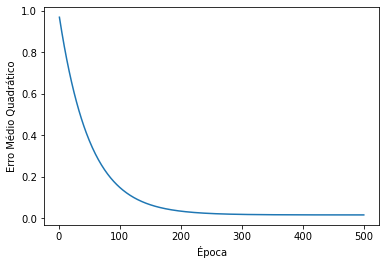

In [112]:
lr = LinearRegressionGD(n_iter= 500)
lr.fit(X_train_std, y_train_std)


plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('Erro Médio Quadrático')
plt.xlabel('Época')
plt.show()

### Previsão


Vamos usar nosso conjunto de teste para aplicar os valores que alcançamos no trenamento.

Precisamos incorporar mais um método à nossa classe. Mantendo a tradição das bibliotecas de ML, chamaremos de **predict**

In [113]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state  
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # cria um gerador de números aleatórios
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # Cria o vetor inicial de pesos
        self.b_ = np.array([0.]) # cria o bias inicial
        self.losses_ = [] # Uma lista vazia para alocarmos as perdas calculadas em cada passo do algoritmo
        
        # Loop no número de iterações
        for i in range(self.n_iter):
            output = np.dot(X, self.w_) + self.b_ # Realiza as previsões dado w e b de momento
            desvios = (output -  y) # calcula o desvio de cada exemplo
            self.w_ -= self.eta * X.T.dot(desvios) / X.shape[0] # Atualiza o w
            self.b_ -= self.eta * desvios.mean() # Atualiza o b
            loss = (desvios**2).mean() # Computa a perda
            self.losses_.append(loss) # Coloca a perda visualizada no passo na lista de perdas
        return self # Retorna o objeto transformado (temos novos w_ e b_)
        
    def predict(self, X):
        return np.dot(X, self.w_) + self.b_

In [114]:
# Repetindo o treinamento
lr = LinearRegressionGD(n_iter= 500)
lr.fit(X_train_std, y_train_std)


# Transformando os dados de teste usando a mesma escala utilizada para os dados de treinamento
X_test_std = sc_x.transform(X_test)

# Aplicando a previsão
y_hat_std = lr.predict(X_test_std)

y_hat_std

array([-0.44900,  0.95617, -0.01834, -0.28932,  1.63059,  1.62359,
       -0.14612,  1.10457, -1.44826,  0.18860,  0.96587,  0.78086,
        0.24074, -1.00993, -1.14786, -1.33407,  1.17478, -1.34274,
       -0.78501, -0.84086,  0.90137,  0.68747, -1.65244, -0.87315,
        0.20664,  0.79796,  0.25788,  0.46975, -0.87947,  1.51341,
        0.33709,  1.48367, -1.11107,  1.74174, -1.41014,  1.37322,
       -0.57634,  0.41092, -1.63590, -0.67140, -0.20773,  0.11202,
       -1.53584, -1.55397, -1.48084,  0.54021, -0.13247, -0.81663,
       -1.55770, -0.54420,  0.02482, -0.78820,  1.59130, -0.06853,
       -0.40957,  0.34150, -0.62135, -1.66326,  0.12050,  0.95765,
        0.81283,  0.28896, -0.91907, -1.17131, -1.40718, -0.16692,
        0.31846, -1.31130,  0.74808,  0.48170,  1.01443, -0.84984,
       -1.04545, -0.81105,  1.11204,  0.11655,  0.34291, -0.18803,
       -1.32682, -0.75165,  1.11877, -1.00525, -0.08478,  1.13320,
       -1.21769,  0.12408,  1.56485, -0.48987, -0.44999,  0.25

Perceba que os dados que obtivemos não estão na escala de preços de apartamentos. Precisamos transformá-los.

Para isso, usamos a função inversa da transformação de y_train.

In [115]:
y_hat = sc_y.inverse_transform(y_hat_std.reshape(-1, 1))

In [116]:
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})

print(y_hat)

[[ 413617.61550]
 [ 792275.23105]
 [ 529667.93486]
 [ 456646.85773]
 [ 974014.95155]
 [ 972129.60044]
 [ 495235.89810]
 [ 832266.35284]
 [ 144339.41363]
 [ 585434.33465]
 [ 794890.64306]
 [ 745033.90690]
 [ 599485.61716]
 [ 262459.19829]
 [ 225289.84973]
 [ 175111.76429]
 [ 851185.75629]
 [ 172775.78447]
 [ 323070.19756]
 [ 308020.55283]
 [ 777507.98792]
 [ 719868.26964]
 [ 89319.60101]
 [ 299318.95695]
 [ 590296.57194]
 [ 749641.53538]
 [ 604103.07334]
 [ 661197.84120]
 [ 297615.25496]
 [ 942437.27322]
 [ 625448.84278]
 [ 934424.09294]
 [ 235204.16504]
 [ 1003967.83009]
 [ 154612.01346]
 [ 904661.49812]
 [ 379300.55318]
 [ 645343.33524]
 [ 93776.70639]
 [ 353686.00614]
 [ 478631.42925]
 [ 564798.84948]
 [ 120738.71831]
 [ 115853.71506]
 [ 135559.86669]
 [ 680184.02474]
 [ 498912.79321]
 [ 314548.90912]
 [ 114849.48551]
 [ 387962.66147]
 [ 541300.00653]
 [ 322208.93550]
 [ 963426.71298]
 [ 516144.67324]
 [ 424241.51621]
 [ 626636.23477]
 [ 367172.13656]
 [ 86403.92424]
 [ 567082.81180]

In [117]:
y_test

array([ 374670.69148,  800391.62942,  493671.34772,  429569.52006,
        1032790.11930,  1044645.76883,  463790.43167,  855601.06787,
        182249.02104,  554162.58354,  831492.25451,  732268.25367,
        569347.36670,  257091.75814,  260736.50502,  212124.66539,
        889709.76450,  215741.12036,  287187.71980,  306709.20766,
        757319.26574,  706097.67893,  143006.26140,  286492.06447,
        556173.77255,  742616.12088,  592120.30084,  630047.35682,
        317681.53730,  997203.13343,  596255.66247,  983394.65964,
        219255.70104,  1076203.73944,  175767.39781,  931463.42497,
        346378.01132,  620102.65798,  152424.31784,  316189.39860,
        455312.04457,  524790.61116,  178517.97659,  153797.32280,
        180072.66968,  652937.45459,  475941.44174,  303843.33742,
        161425.80368,  364619.96035,  494444.37968,  323373.06857,
        1032362.39393,  474454.29524,  393300.54893,  585825.79154,
        342831.25804,  152316.19253,  521461.03163,  79124

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [119]:
print(f"w: {lr.w_}")
print(f"b: {lr.b_}")
print(f"MSE: {mean_squared_error(y_test, y_hat)}")
print(f"MAE: {mean_absolute_error(y_test, y_hat)}")

w: [ 0.98246  0.10890 -0.03260]
b: [-0.00000]
MSE: 1252460721.4512322
MAE: 30499.403439670397


# Usando a biblioteca de Regressão Linear do Scikit-learn

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_std, y_train_std)
y_pred_std = lin_reg.predict(X_test_std)

y_pred = sc_y.inverse_transform(y_pred_std.reshape(-1, 1))

print(f"w: {lin_reg.coef_}")
print(f"b: {lin_reg.intercept_}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

w: [ 0.98914  0.11038 -0.03381]
b: -3.0520616263739904e-15
MSE: 1254044673.0267076
MAE: 30545.752993863447


# Usando Transformações Polinomiais


Apesar de chamado de Regressão Linear, alguns ajustes nos dados podem deixar o modelo mais complexo, adicionando a possibilidade de não linearidade durante o treinamento. 

Por exemplo, a função:

- $f(x) = w_1 x_1 + w_2 x_2 + b $


Poderia ser redefinida como:

- $f(x) = w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_2^2 + w_5 x_1 x_2 + b $


Perceba que o modelo continua linear do ponto de vista dos coeficientes. A não linearidade está nos atributos!

Em outras palavras, estamos criando "novos atributos" a partir dos atributos originais do conjunto de dados.




In [122]:
from sklearn.preprocessing import PolynomialFeatures

In [123]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly_train_std = poly_features.fit_transform(X_train_std)
X_poly_test_std = poly_features.transform(X_test_std)

lin_reg.fit(X_poly_train_std, y_train_std)
y_poly_pred_std = lin_reg.predict(X_poly_test_std)

y_poly_pred = sc_y.inverse_transform(y_poly_pred_std.reshape(-1, 1))

print(f"w: {lin_reg.coef_}")
print(f"b: {lin_reg.intercept_}")
print(f"MSE: {mean_squared_error(y_test, y_poly_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_poly_pred)}")

w: [ 0.98577  0.11161 -0.02613  0.14042  0.00202  0.00667  0.00392 -0.00113
  0.00052]
b: -0.14510391779858156
MSE: 97334573.06357545
MAE: 8085.0771911721895


# Usando modelos mais robustos


Algumas variações do modelo de Regressão Linar incorporam penalidades ao uso dos coeficientes.

A ideia é evitar um superajuste aos dados de treinamento e melhorar, assim, a generalização do modelo.

Em situações mais complexas esse efeito é importante. 
  

In [136]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [138]:
X_train_std = X_poly_train_std
X_test_std = X_poly_test_std

In [139]:
#Ridge Regression

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_std, y_train_std)
y_ridge_pred_std = ridge_reg.predict(X_test_std)
y_ridge_pred = sc_y.inverse_transform(y_ridge_pred_std.reshape(-1, 1))


print(f"MSE: {mean_squared_error(y_test, y_ridge_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_ridge_pred)}")



MSE: 107424131.21913005
MAE: 8405.33772042533


In [140]:
#Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_std, y_train_std)
y_lasso_pred_std = lasso_reg.predict(X_test_std)
y_lasso_pred = sc_y.inverse_transform(y_lasso_pred_std.reshape(-1, 1))

print(f"MSE: {mean_squared_error(y_test, y_lasso_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_lasso_pred)}")


MSE: 2390250237.566013
MAE: 41904.16944608518


In [141]:
# Elastic Net Regression

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_std, y_train_std)
y_elastic_pred_std = elastic_net.predict(X_test_std)
y_elastic_pred = sc_y.inverse_transform(y_elastic_pred_std.reshape(-1, 1))

print(f"MSE: {mean_squared_error(y_test, y_elastic_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_elastic_pred)}")


MSE: 1958937761.6558297
MAE: 37330.54730440226
